#Jonathan Halverson
#Monday, February 22, 2016
#Inference for Numerical Data

##T-distribution 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

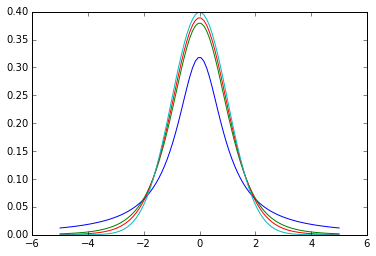

In [4]:
from scipy.stats import t
from scipy.stats import norm
x = np.linspace(-5, 5, num=100)
lines = plt.plot(x, t.pdf(x, df=1), x, t.pdf(x, df=5), x, t.pdf(x, df=10), x, norm.pdf(x))

###The figure illustrates that as the degrees of freedom increases, the t-distribution approaches the stardard normal distribution. 

###A 95% confidence interval for a population mean, μ, is given as (18.985, 21.015). This confidence interval is based on a simple random sample of 36 observations. Calculate the sample mean and standard deviation. Assume that all conditions necessary for inference are satisfied. Use the t-distribution in any calculations. 

In [5]:
margin = 0.5 * (21.015 - 18.985)
mu = 18.985 + margin
print mu

20.0


In [6]:
s = margin * np.sqrt(36) / 2.03
print s

3.0


###The number 2.03 is taken from the table from a two-sided test gives 0.05 with df=35. 

## Sleep Problem 

###New York is known as “the city that never sleeps”. A random sample of 25 New Yorkers were asked how much sleep they get per night. Statistical summaries of these data are shown below. Do these data provide strong evidence that New Yorkers sleep less than 8 hours a night on average?

In [7]:
n = 25
x_bar = 7.73
s = 0.77
null_value = 8.0

###Estimate the standard error in the population mean: 

In [8]:
SE = s / np.sqrt(n)

###Compute the T score: 

In [9]:
T = (x_bar - null_value) / SE
print T

-1.75324675325


###Compute a one-sided p-value: 

In [10]:
p_value = t.cdf(T, n - 1)
print p_value, p_value > 0.05

0.0461626142303 False


###If in fact the true population mean of the amount New Yorkers sleep per night was 8 hours, the probability of getting a random sample of 25 New Yorkers where the average amount of sleep is 7.73 hrs per night or less is 0.046. Therefore, we reject the null hypothesis.

##Piano Time 

###Georgianna claims that in a small city renowned for its music school, the average child takes at least 5 years of piano lessons. We have a random sample of 20 children from the city, with a mean of 4.6 years of piano lessons and a standard deviation of 2.2 years. (a) Evaluate Georgianna’s claim using a hypothesis test. (b) Construct a 95% confidence interval for the number of years students in this city take piano lessons, and interpret it in context of the data. (c) Do your results from the hypothesis test and the confidence interval agree? Explain your reasoning. 

In [11]:
n = 20
df = n - 1
mu = 5.0
s = 2.2

###H0: mu = 5, HA: mu <5 

In [12]:
SE = s / np.sqrt(n)
T = (4.6 - mu) / SE
print T

-0.813115628182


###Using the T statistic we can compute the p-value: 

In [13]:
p_value = t.cdf(T, df)
print p_value, p_value > 0.05

0.213112041546 True


###The calculation shows that if the null hypothesis is truen the the group sample would have a mean of 4.6 with probability 0.21. This is larger than our significance level of 0.05 so we fail to reject the null hypothesis. Georgianna's claim passes this test. Next, we construct the 95% confidence interval for the population mean. We have $\bar{x} \pm t^*_{df}SE$ where $t^*_{df}$ is a cutoff value (or t critical value) such that 95% of the t-distribution is between $-t^*_{df}$ and $t^*_{df}$. 

In [14]:
1.0 - 2 * t.cdf(-2.09, df)

0.94970012142908833

In [15]:
t_critical = t.ppf(0.975, df)
print(t_critical)

2.09302405441


###We use ppf(q=0.975) to get the desired t-critical value instead of q = 0.95 because the distribution has two tails. 

In [16]:
4.6 - t_critical * SE, 4.6 + t_critical * SE

(3.5703683058761988, 5.6296316941238)

###We are 95% confident that the average number of years a child takes piano lessons in this city is 3.57 to 5.63 years. 

###Below we plot the ppf and cdf which are inverses of each other, and the pdf: 

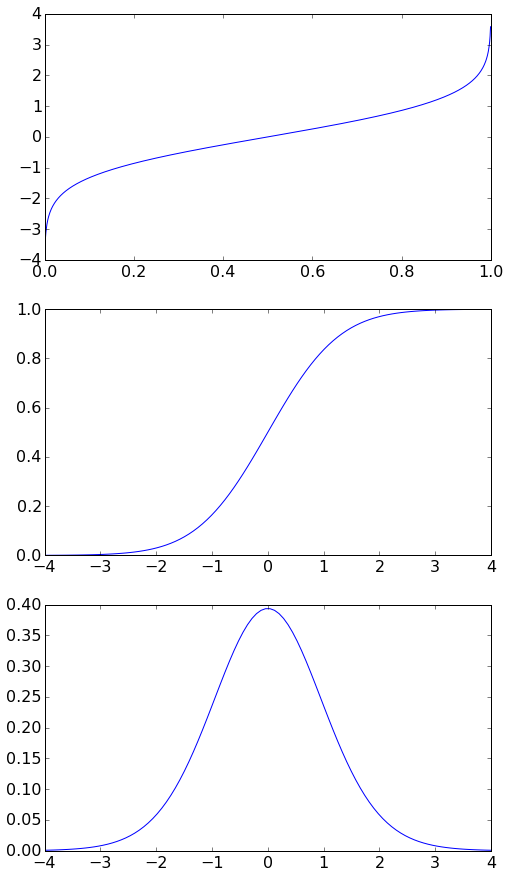

In [24]:
fig = plt.figure(1, figsize=(8, 15))
plt.rcParams['font.size'] = 16

ax1 = fig.add_subplot(3, 1, 1)
x = np.linspace(0.001, 0.999, num=999)
plt.plot(x, t.ppf(x, df))

ax2 = fig.add_subplot(3, 1, 2)
x = np.linspace(-4, 4, num=100)
plt.plot(x, t.cdf(x, df))

ax3 = fig.add_subplot(3, 1, 3)
x = np.linspace(-4, 4, num=100)
plt.plot(x, t.pdf(x, df))

###Just watched  a YouTube video that said for a population where 40% feel the economy is going backwards, by chance you not see 50/50 in a random sample of 1000 people: 

In [18]:
from scipy.stats import binom
print binom.pmf(k=500, n=1000, p=0.4)
print 1.0 - binom.cdf(k=499, n=1000, p=0.4)

3.44705337093e-11
1.01480268633e-10


In [19]:
print binom.pmf(k=50, n=100, p=0.4)
print 1.0 - binom.cdf(k=49, n=100, p=0.4)

0.0103375112538
0.027099197757


In [20]:
print binom.pmf(k=5, n=10, p=0.4)
print 1.0 - binom.cdf(k=4, n=10, p=0.4)

0.2006581248
0.3668967424


In [21]:
ns = [10, 100, 1000, 10000]
p50 = [1.0 - binom.cdf(k, n, p=0.4) for k, n in zip([4, 49, 499, 4999], ns)]

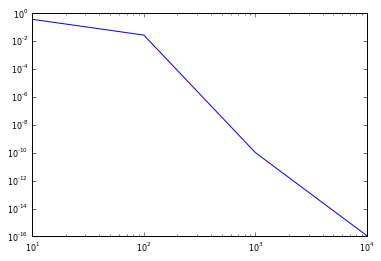

In [22]:
plt.loglog(ns, p50)

###All this confirms the claim in the video. As n increases, the central limit theorem kicks in and the standard deviation grows slowly, $\sigma \sim n^{1/2}$. 